<a href="https://colab.research.google.com/github/ismael-rtellez/House_Price_Prediction/blob/main/Housing_Price_Forecasts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1: Features selection for practice

In [1]:
import pandas as pd

df = pd.read_csv('train.csv')

# Separate features
train_df = df[['GrLivArea','YearBuilt', 'SalePrice']]
train_df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


##Problem 2: Estimation and Evaluation by Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = train_df[['GrLivArea', 'YearBuilt']].values
y = train_df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 2) (365, 2) (1095,) (365,)


In [3]:
# Estimation with linear regression
from sklearn.linear_model import LinearRegression

reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)
pred_rl = reg_linear.predict(X_test)

result_reg = pd.DataFrame([pred_rl, y_test])
result_reg

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,130445.811295,306448.482115,88741.83243,168496.12883,227800.175627,99569.776607,186783.751359,182056.442932,97457.76007,151960.15487,...,117136.663198,123028.552962,33091.866227,225386.487363,260578.747155,232862.651569,162134.564318,273133.55871,235276.235017,137452.405569
1,154500.000000,325000.000000,115000.00000,159000.00000,315500.000000,75500.000000,311500.000000,146000.000000,84500.00000,135500.00000,...,151500.000000,134500.000000,94000.000000,216000.000000,350000.000000,195000.000000,120000.000000,228500.00000,248000.000000,124000.000000


In [4]:
from sklearn.metrics import mean_squared_error

print("Mean Squared Error:", mean_squared_error(y_test, pred_rl))

Mean Squared Error: 2314465092.732015


In [70]:
import matplotlib.pyplot as plt
def plot_graph(xlabel, ylabel, X, y_true, y_test):
  plt.figure(figsize=(10, 6))
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title('Visualization between ' + xlabel + ' and ' + ylabel)
  plt.scatter(X, y_true, color='blue', label="true value")
  plt.scatter(X, y_test, color='red', label="predicted value")
  plt.legend()
  plt.show()

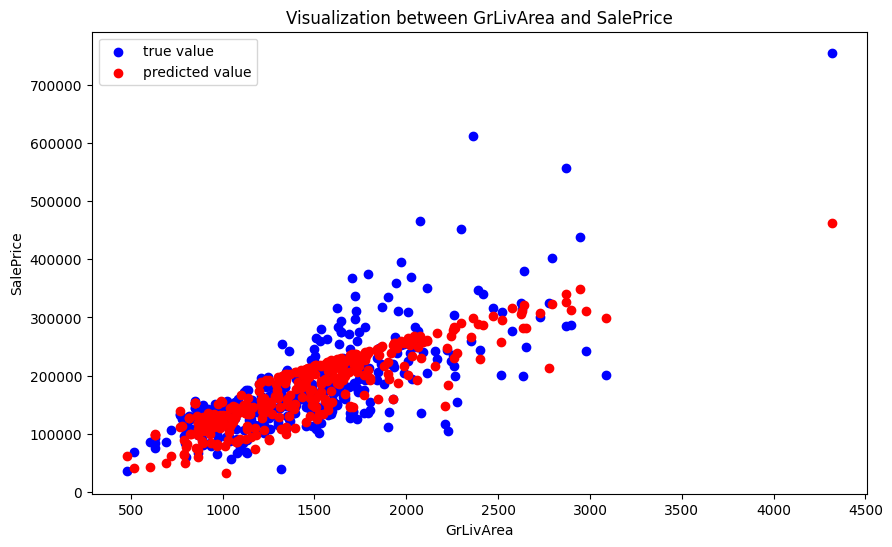

In [71]:
graph_reg = plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, pred_rl)

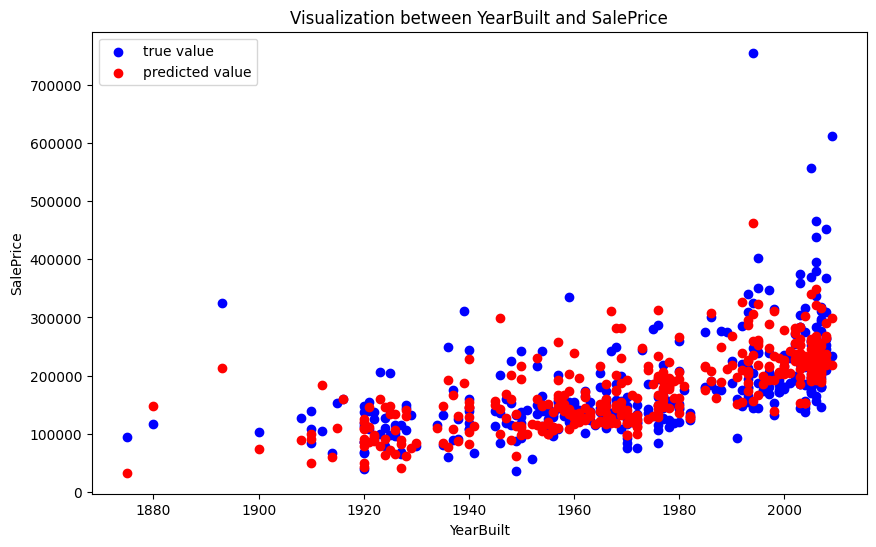

In [72]:
graph_reg2 = plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, pred_rl)

## Problem 3: Comparison of Methods

In [8]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

-**SVM**

In [9]:
# SVM
svm_reg = SVR()
svm_reg.fit(X_train, y_train)
pred_svr = svm_reg.predict(X_test)

print('Mean Squared Error', mean_squared_error(y_test, pred_svr))

Mean Squared Error 7171025750.700425


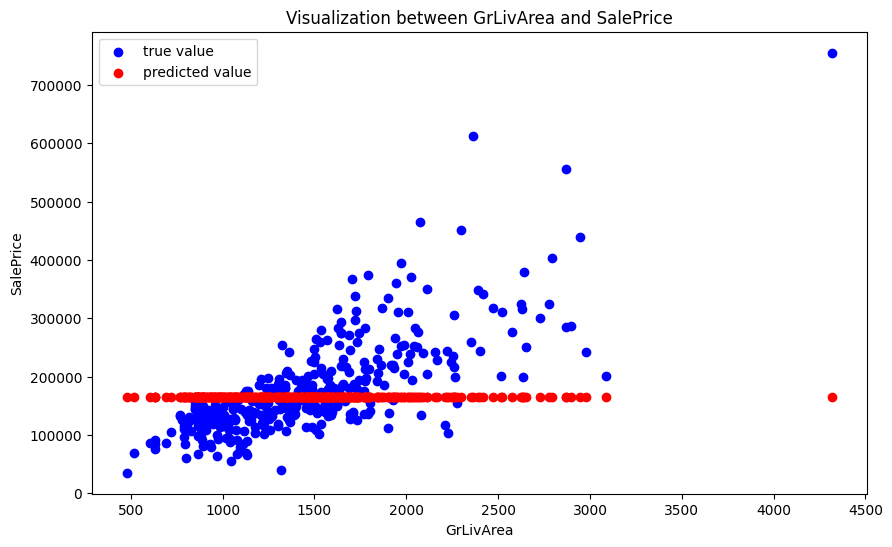

In [73]:
graph_svr = plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, pred_svr)

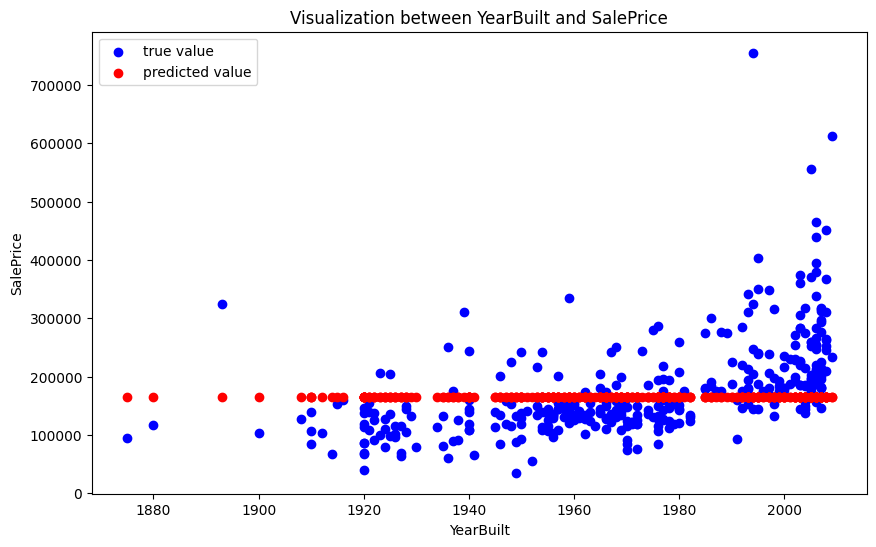

In [74]:
graph_svr2 = plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, pred_svr)

-**Decision Tree**

In [50]:
tree_reg = DecisionTreeClassifier()
tree_reg.fit(X_train, y_train)
pred_tree = tree_reg.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, pred_tree))

Mean Squared Error: 2985836588.0328765


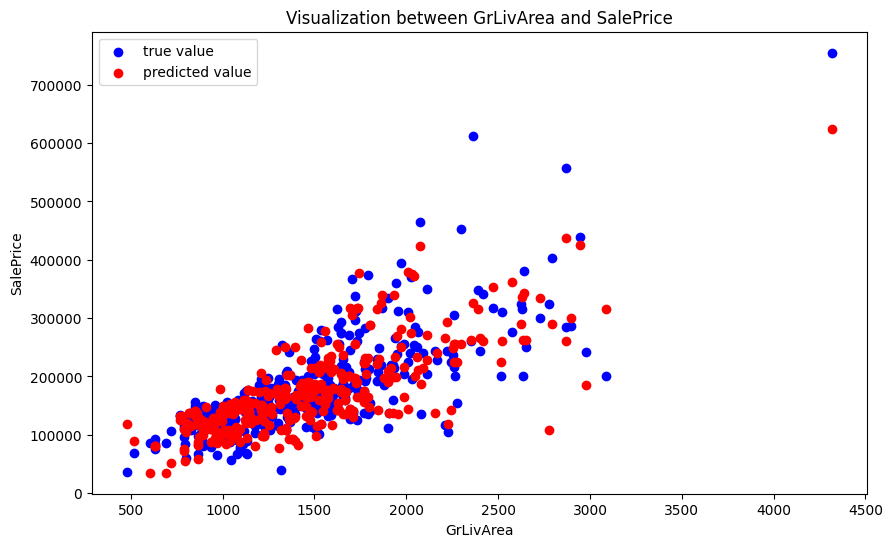

In [75]:
graph_tree = plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, pred_tree)

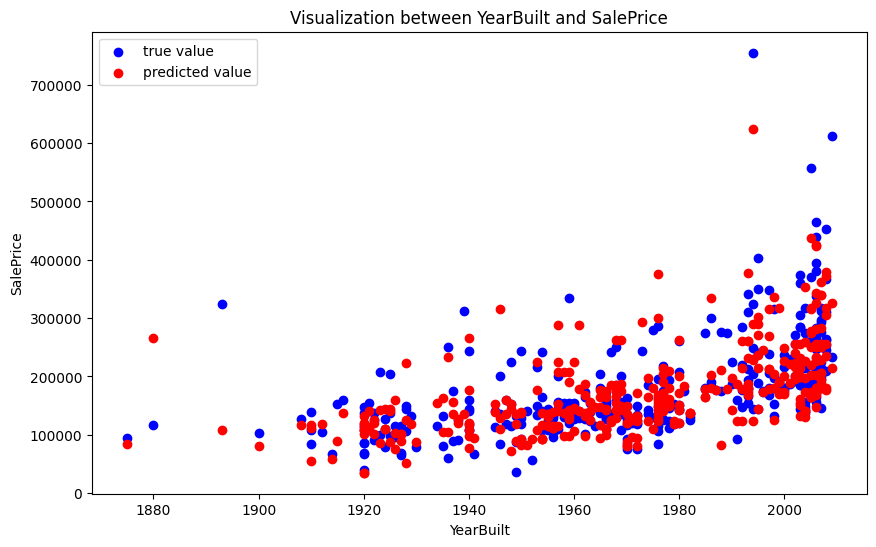

In [76]:
graph_tree2 = plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, pred_tree)

-**Random Forest**

In [15]:
rf_reg = RandomForestClassifier()
rf_reg.fit(X_train, y_train)
pred_rf = rf_reg.predict(X_test)

print("Mean Squared  Error:", mean_squared_error(y_test, pred_rf))

Mean Squared  Error: 2572602385.10137


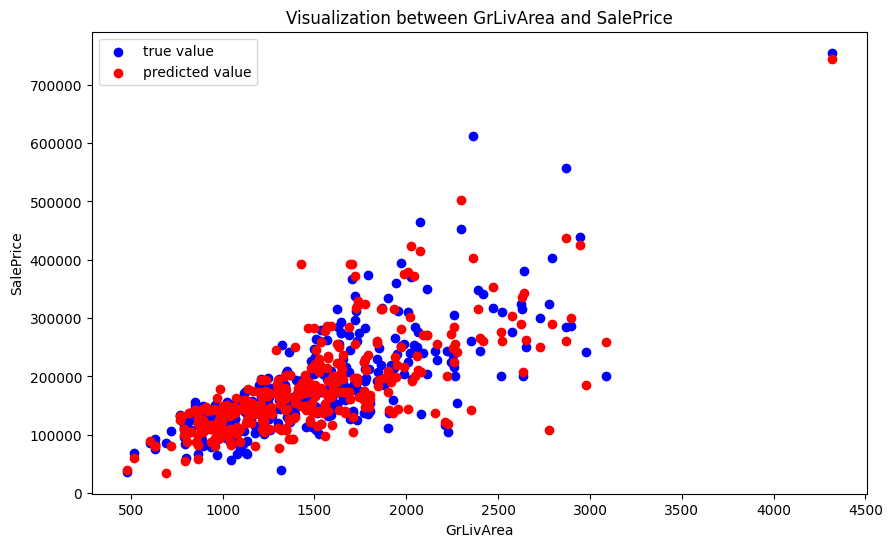

In [77]:
graph_rf = plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, pred_rf)

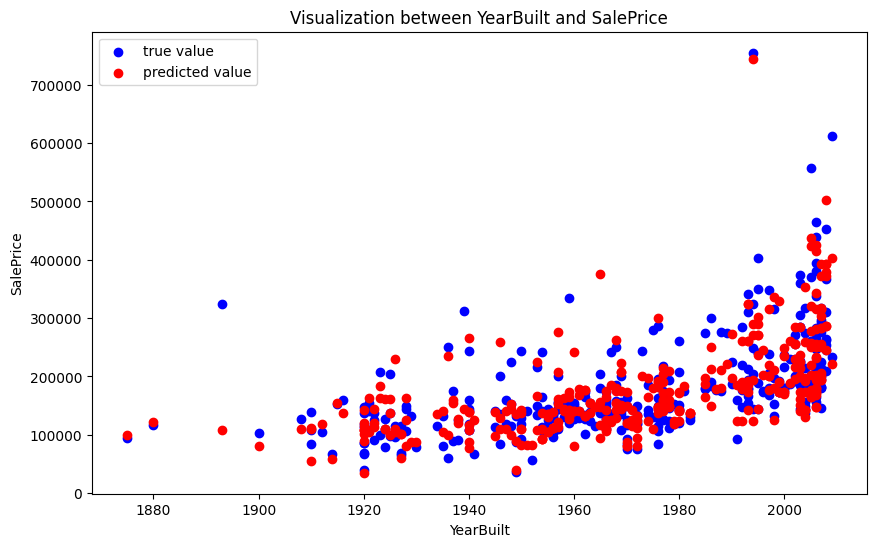

In [78]:
graph_rf2 = plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, pred_rf)

###**Summary of Regression, SVR, Decision Tree and Random Forest Model's Perfonmance**
|Model                       | MSE Value            | Performance                                               |
|----------------------------|---------------------|-----------------------------------------------------------|
|Linear Regression           | 2,314,465,092.73     | Best-performing among tested models                        |
| SVR (Support Vector Regression) | 7,171,025,750.70 | Highest error—poor fit                                    |
| Decision Tree               | 2,985,836,588.03     | Overfits, leading to higher variance                      |
| Random Forest               | 2,572,602,385.10     | Strong generalization, but slightly worse than Linear Regression |

###**Discussion Based on results & Visualized Figures**

*   **Best Model: Linear Regression** had the lowest MSE (2.34B), meanit it provided the most **accurate** house price predictions among the tested methods.
*   **Worst Performance: SVR performed poorly**, with predicted values appearing **horizontally aligned** in the scatter plot, showing it struggled to fit the data.
*   **Decision Tree Limitations:** This model **overfits**, meaning it memorized patterns rather than generalizing well, resulting in a slightly high **MSE** (2.98B).
*   **Random Forest Strengths:** This model **balanced accuracy and generalization**, reducing overfitting compared to Decision Tree but still slightly trailing Linear Regression.



### **Visualization Insights**

*  **Linear Regressions scatter plots** showed a **clear trend**, with predicted sale prices aligning well with actual data.
*  **SVR scatter plots had horizontally aligned predictions**, indicating a **poor relationship capture**.
*  **Decision Tree scatter plots showed sharp divisions**, suggesting slightly overfiting to training data.
*  **Random Forest scatter plots demostrated a more refined trend**, proving its ability to handle **complex housing price variations** better.

## Problem 4: (Advanced Assignment) Learning with other features

In [58]:
train_df2 = df[['GrLivArea','YearBuilt', 'LotArea', 'TotRmsAbvGrd', 'YrSold', 'SalePrice']]
train_df2

,GrLivArea,YearBuilt,LotArea,TotRmsAbvGrd,YrSold,SalePrice
0,1710,2003,8450,8,2008,208500
1,1262,1976,9600,6,2007,181500
2,1786,2001,11250,6,2008,223500
3,1717,1915,9550,7,2006,140000
4,2198,2000,14260,9,2008,250000
...,...,...,...,...,...,...
1455,1647,1999,7917,7,2007,175000
1456,2073,1978,13175,7,2010,210000
1457,2340,1941,9042,9,2010,266500
1458,1078,1950,9717,5,2010,142125


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X2 = train_df2[['GrLivArea','YearBuilt', 'LotArea', 'TotRmsAbvGrd', 'YrSold']].values
y2 = train_df2['SalePrice'].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.25, random_state=42
)

print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(1095, 5) (365, 5) (1095,) (365,)


-**Linear Regression**

In [65]:
linear_reg2 = LinearRegression()
linear_reg2.fit(X_train2, y_train2)
linear_pred2 = linear_reg2.predict(X_test2)

pd.DataFrame([linear_pred2, y_test2])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,127889.014941,305617.17636,91667.292818,162322.861659,231630.176194,100963.145092,187940.539903,176531.035392,96961.532545,152703.892749,...,120456.211903,121623.834465,31887.39589,223968.171682,260554.420515,230859.324526,163723.176252,271719.697676,249412.866127,137062.499562
1,154500.000000,325000.00000,115000.000000,159000.000000,315500.000000,75500.000000,311500.000000,146000.000000,84500.000000,135500.000000,...,151500.000000,134500.000000,94000.00000,216000.000000,350000.000000,195000.000000,120000.000000,228500.000000,248000.000000,124000.000000


In [63]:
print("Mean Squared Error:", mean_squared_error(y_test2, linear_pred2))

Mean Squared Error: 2253299142.866843


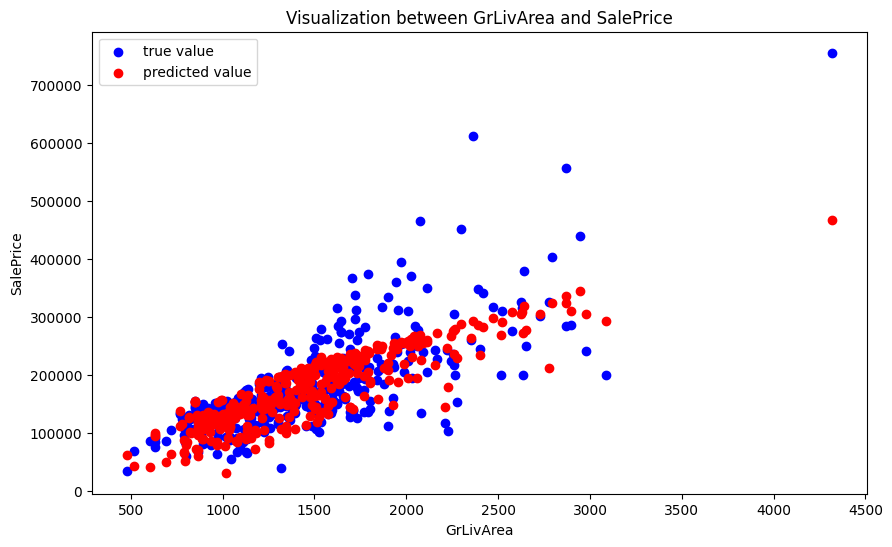

In [79]:
plot_graph('GrLivArea', 'SalePrice', X_test2[:, 0], y_test2, linear_pred2)

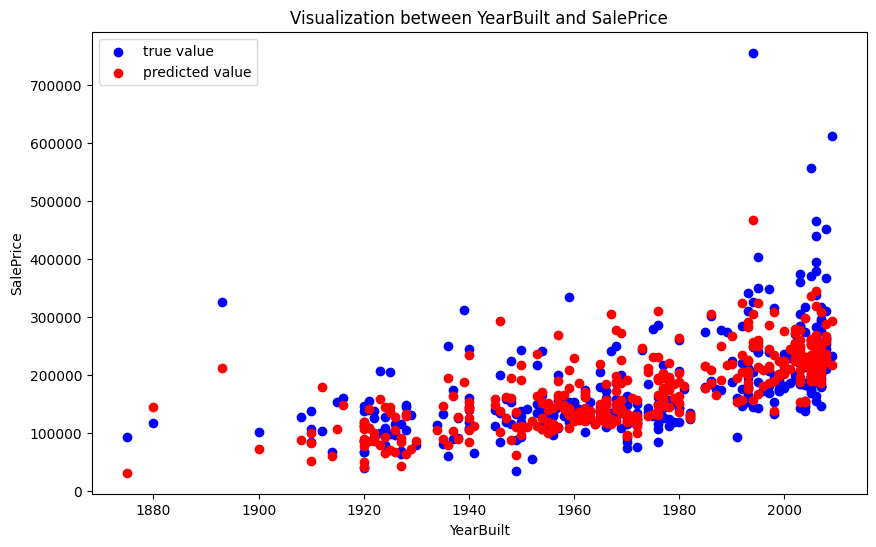

In [80]:
plot_graph('YearBuilt', 'SalePrice', X_test2[:, 1], y_test2, linear_pred2)

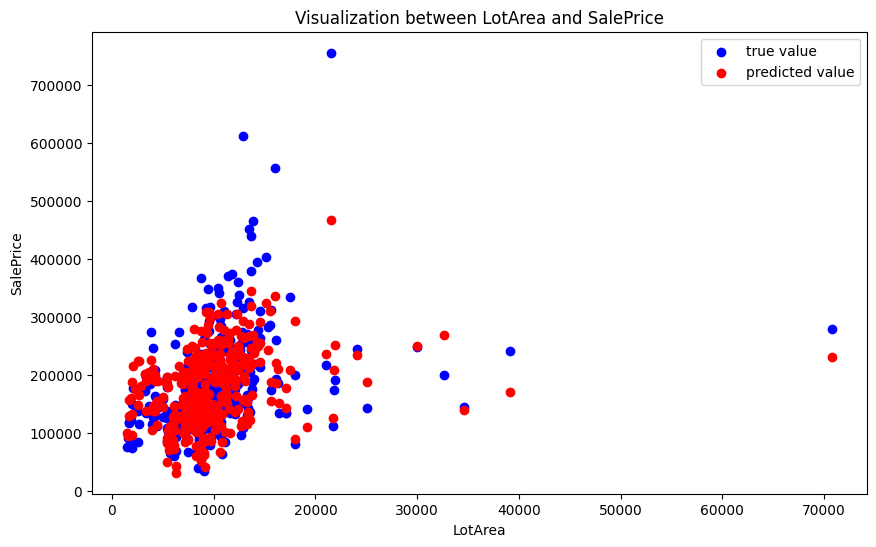

In [81]:
plot_graph('LotArea', 'SalePrice', X_test2[:, 2], y_test2, linear_pred2)

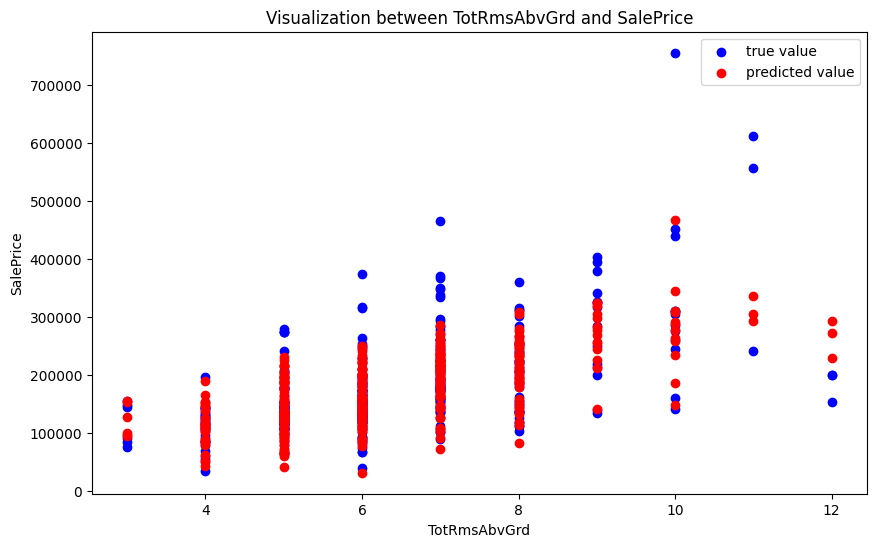

In [82]:
plot_graph('TotRmsAbvGrd', 'SalePrice', X_test2[:, 3], y_test2, linear_pred2)

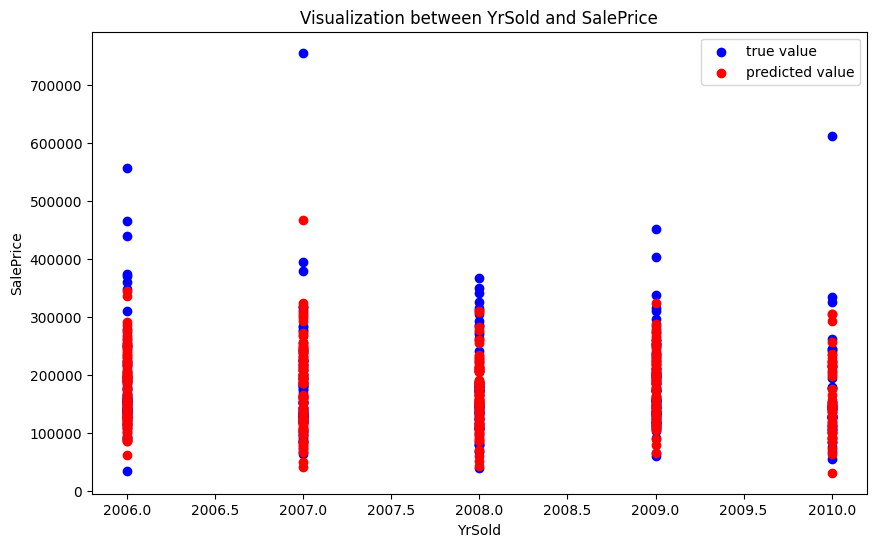

In [83]:
plot_graph('YrSold', 'SalePrice', X_test2[:, 4], y_test2, linear_pred2)

-**SVR**

In [84]:
svr2 = SVR()
svr2.fit(X_train2, y_train2)
svr_pred2 = svr2.predict(X_test2)

pd.DataFrame([svr_pred2, y_test2])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,165033.604756,165080.960952,165039.375256,165004.409671,165085.101069,164987.106517,165111.953383,164990.312684,164987.953386,165116.585764,...,165081.844709,165053.216213,165013.312007,165025.897141,165059.114406,165077.004283,165060.179691,165047.307538,165111.554521,165042.387394
1,154500.000000,325000.000000,115000.000000,159000.000000,315500.000000,75500.000000,311500.000000,146000.000000,84500.000000,135500.000000,...,151500.000000,134500.000000,94000.000000,216000.000000,350000.000000,195000.000000,120000.000000,228500.000000,248000.000000,124000.000000


In [87]:
print("Mean Squared Error:", mean_squared_error(y_test2, svr_pred2))

Mean Squared Error: 7185019508.758182


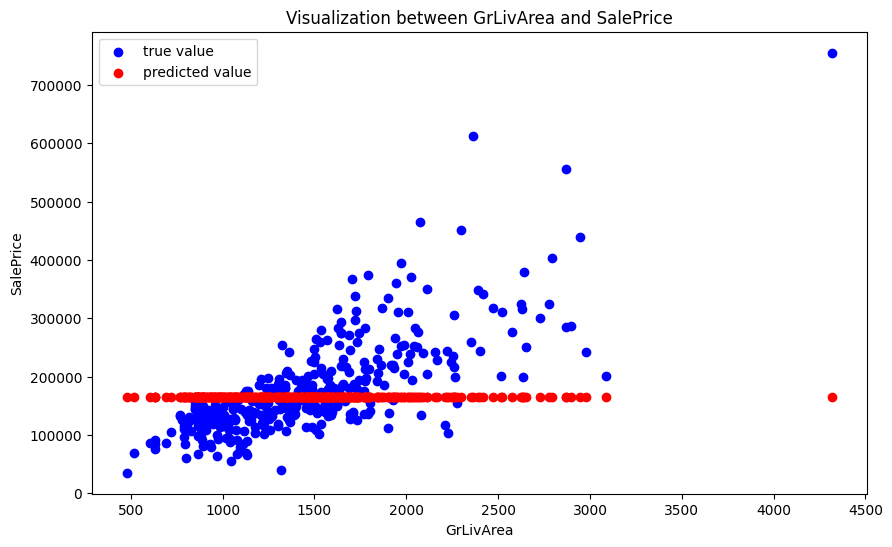

In [88]:
plot_graph('GrLivArea', 'SalePrice', X_test2[:, 0], y_test2, svr_pred2)

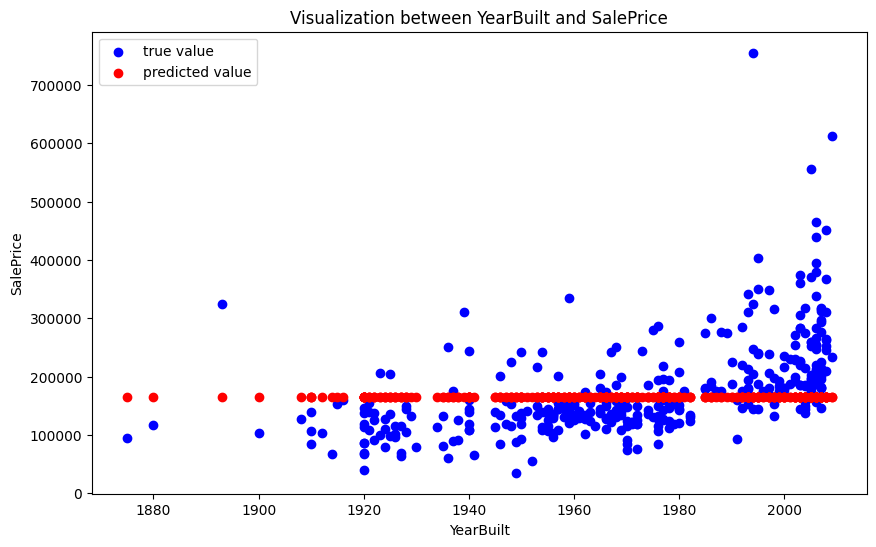

In [89]:
plot_graph('YearBuilt', 'SalePrice', X_test2[:, 1], y_test2, svr_pred2)

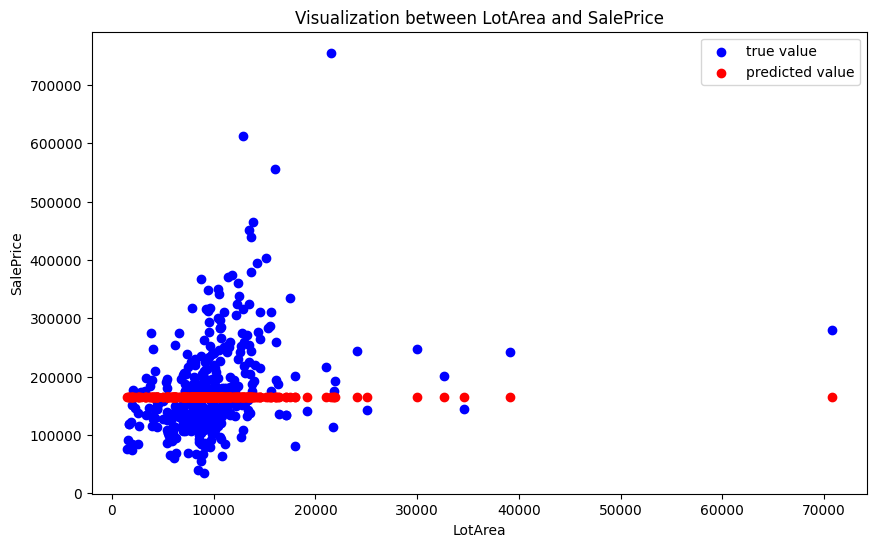

In [90]:
plot_graph('LotArea', 'SalePrice', X_test2[:, 2], y_test2, svr_pred2)

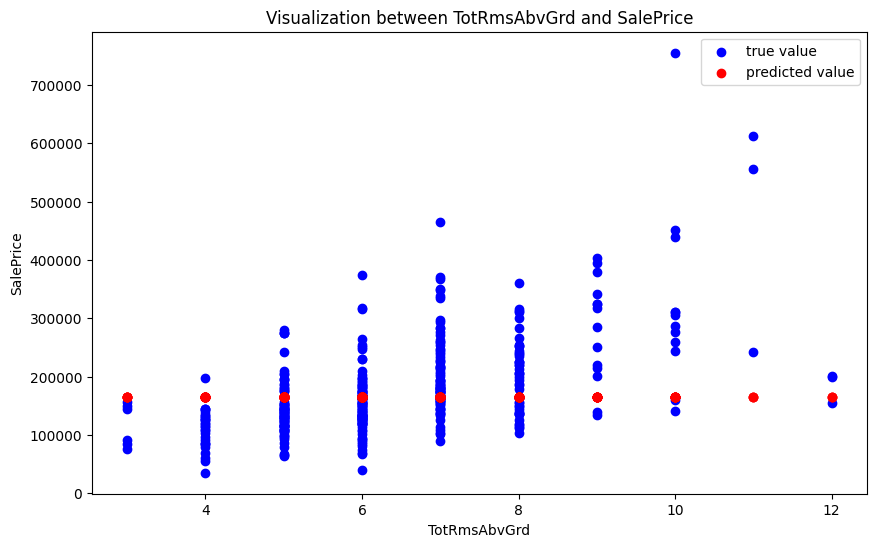

In [91]:
plot_graph('TotRmsAbvGrd', 'SalePrice', X_test2[:, 3], y_test2, svr_pred2)

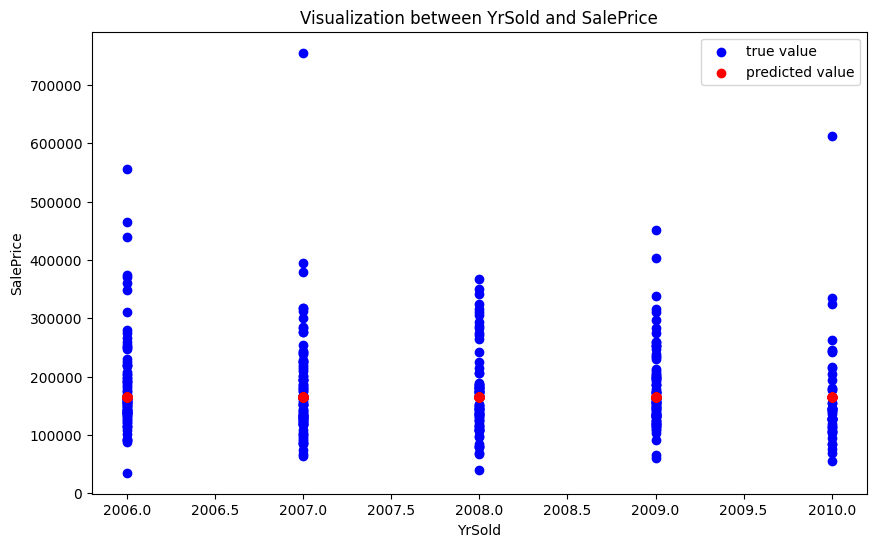

In [92]:
plot_graph('YrSold', 'SalePrice', X_test2[:, 4], y_test2, svr_pred2)

-**Decision Tree**

In [93]:
tree2 = DecisionTreeClassifier()
tree2.fit(X_train2, y_train2)
tree_pred2 = tree2.predict(X_test2)
pd.DataFrame([tree_pred2, y_test2])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,153500,290000,83000,79000,295493,81000,124500,148500,129500,135000,...,178400,129000,96500,200500,194500,375000,186000,226000,231500,174900
1,154500,325000,115000,159000,315500,75500,311500,146000,84500,135500,...,151500,134500,94000,216000,350000,195000,120000,228500,248000,124000


In [94]:
print("Mean Squared Error: ", mean_squared_error(y_test2, tree_pred2))

Mean Squared Error:  2944892161.452055


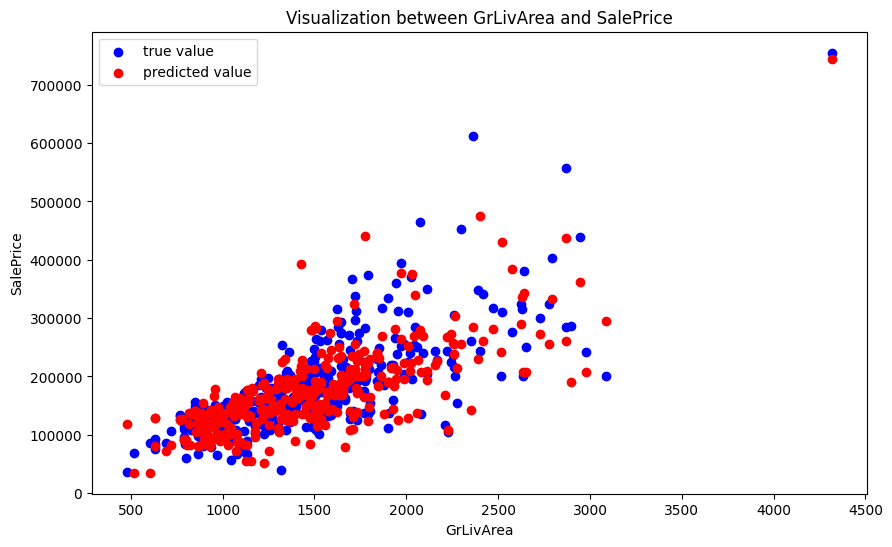

In [95]:
plot_graph('GrLivArea', 'SalePrice', X_test2[:, 0], y_test2, tree_pred2)

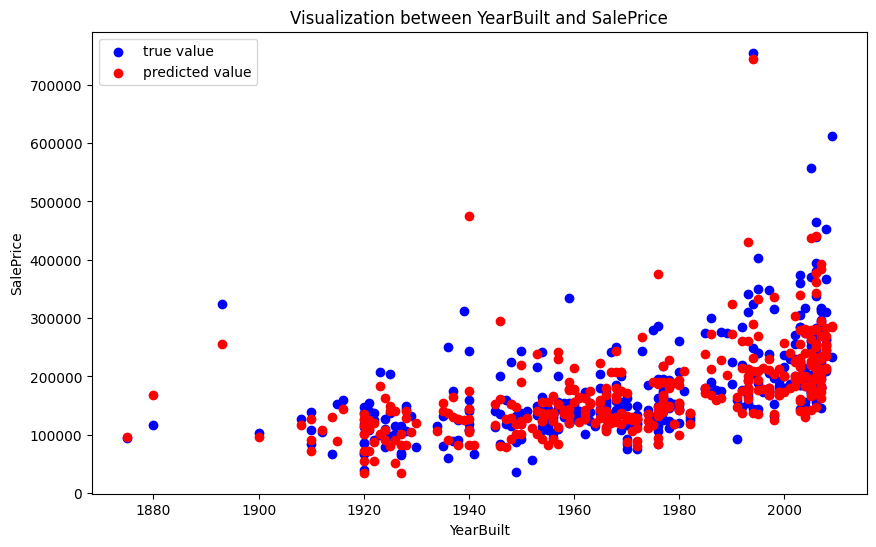

In [96]:
plot_graph('YearBuilt', 'SalePrice', X_test2[:, 1], y_test2, tree_pred2)

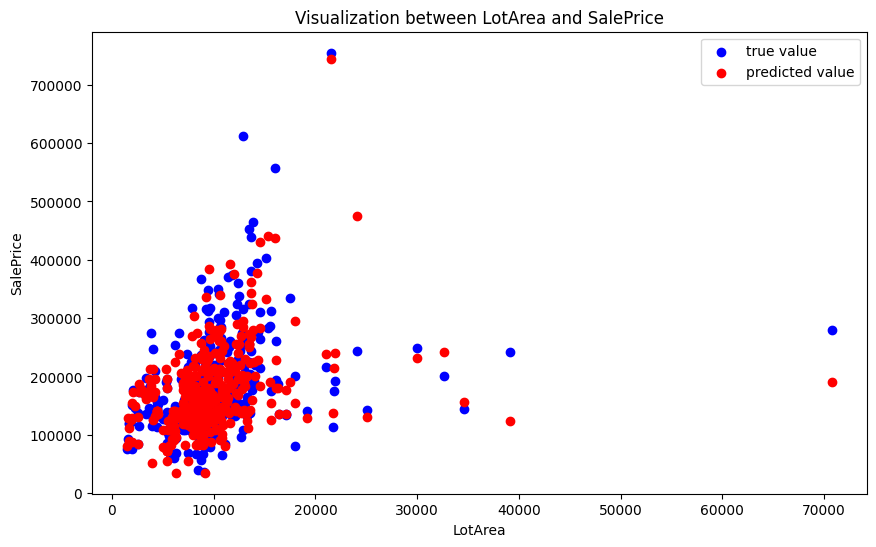

In [97]:
plot_graph('LotArea', 'SalePrice', X_test2[:, 2], y_test2, tree_pred2)

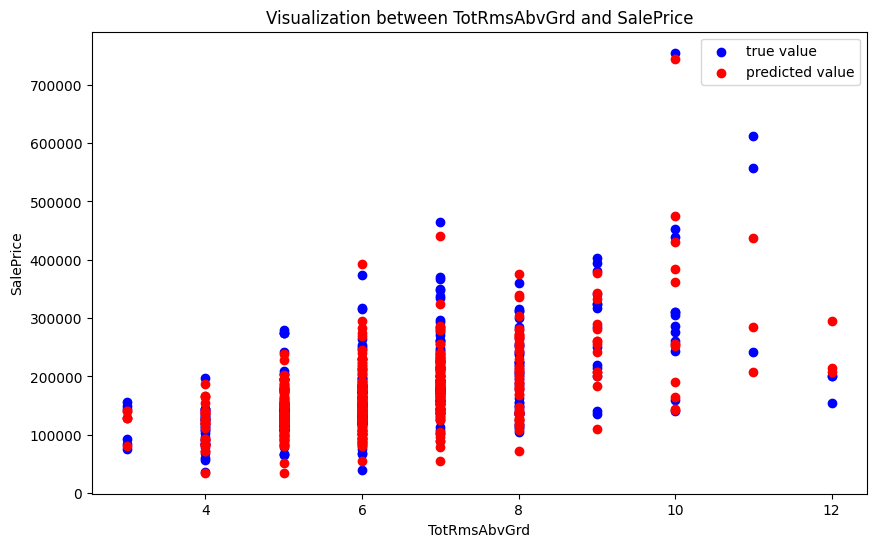

In [98]:
plot_graph('TotRmsAbvGrd', 'SalePrice', X_test2[:, 3], y_test2, tree_pred2)

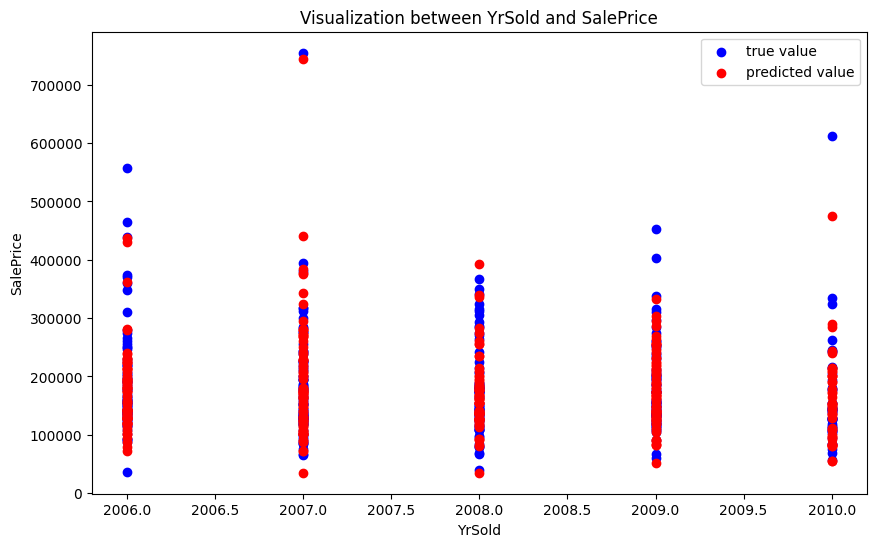

In [99]:
plot_graph('YrSold', 'SalePrice', X_test2[:, 4], y_test2, tree_pred2)

-**Random Forest**

In [113]:
rforest2 = RandomForestClassifier()
rforest2.fit(X_train2, y_train2)
rforest_pred2 = rforest2.predict(X_test2)
pd.DataFrame([rforest_pred2, y_test2])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,132500,290000,76000,161000,325000,80000,177000,148500,86000,118000,...,114500,132500,37900,200500,194500,190000,173000,237000,181000,155000
1,154500,325000,115000,159000,315500,75500,311500,146000,84500,135500,...,151500,134500,94000,216000,350000,195000,120000,228500,248000,124000


In [114]:
print("Mean Squared Error: ", mean_squared_error(y_test2, rforest_pred2))

Mean Squared Error:  2259741193.0876713


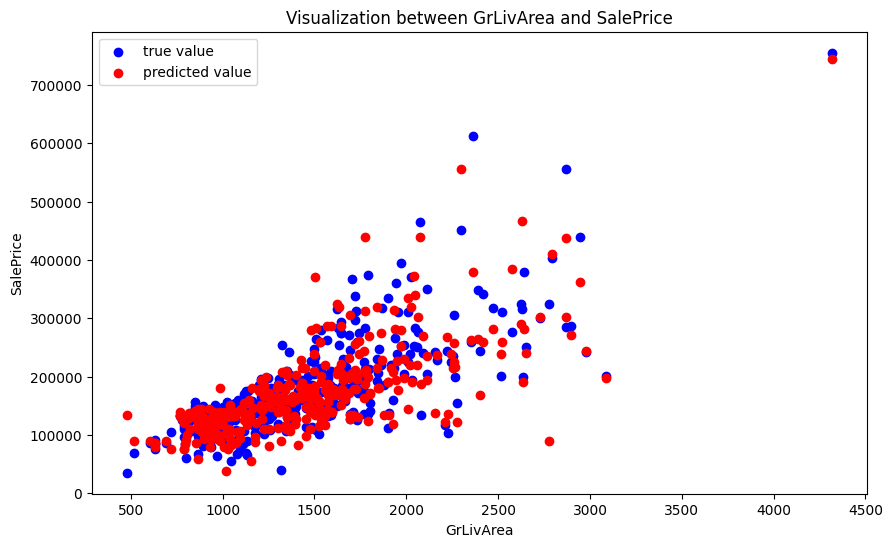

In [115]:
plot_graph('GrLivArea', 'SalePrice', X_test2[:, 0], y_test2, rforest_pred2)

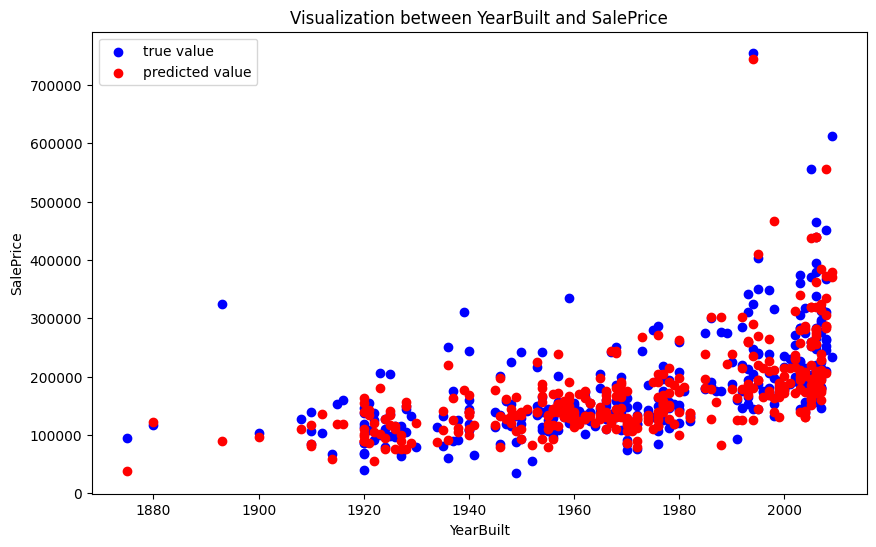

In [116]:
plot_graph('YearBuilt', 'SalePrice', X_test2[:, 1], y_test2, rforest_pred2)

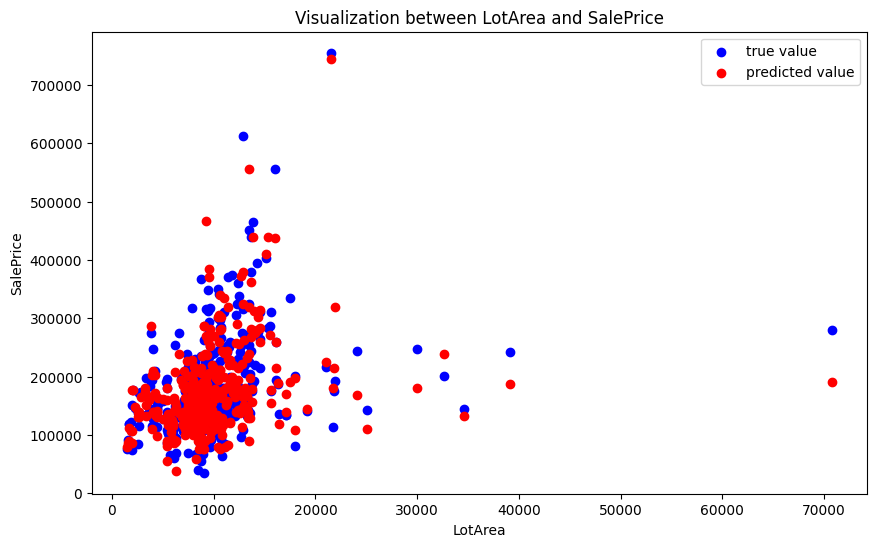

In [117]:
plot_graph('LotArea', 'SalePrice', X_test2[:, 2], y_test2, rforest_pred2)

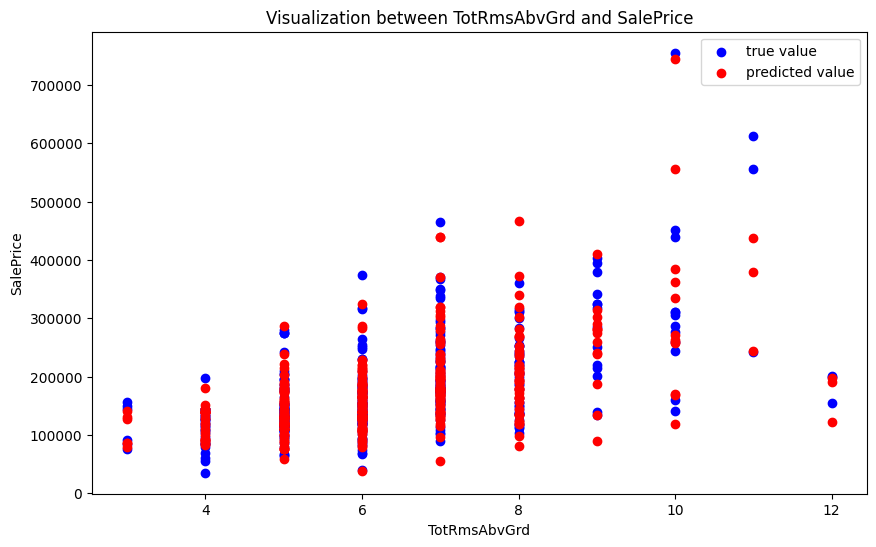

In [118]:
plot_graph('TotRmsAbvGrd', 'SalePrice', X_test2[:, 3], y_test2, rforest_pred2)

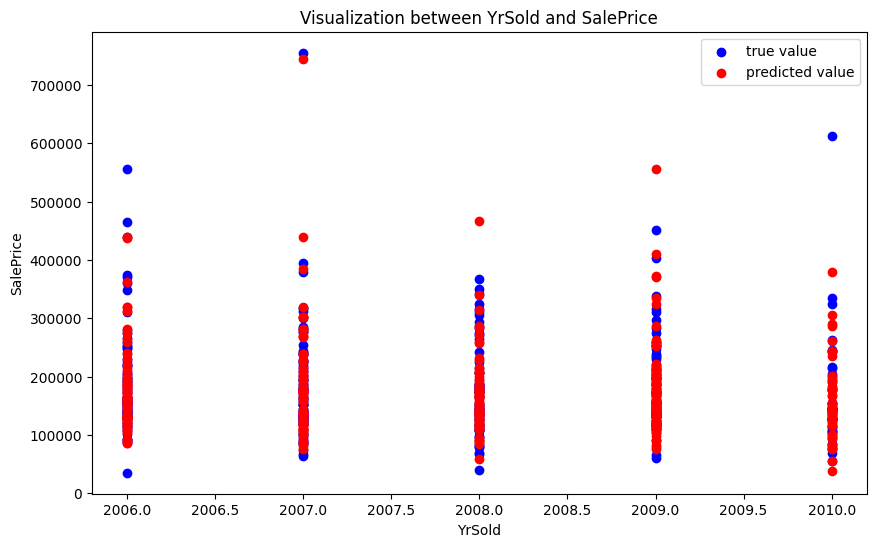

In [119]:
plot_graph('YrSold', 'SalePrice', X_test2[:, 4], y_test2, rforest_pred2)